In [26]:
## Endos Renyi Random network model 
import networkx as nx
import numpy as np 
from matplotlib import pyplot as plt
from random import sample

def preferentialgrowth_graph(n,n0,m):
    A = np.zeros((n,n))
    for i in range(n0):
        for j in range(i+1,n0):
            A[i,j] = 1
    A = A + np.transpose(A)
    for t in range(n-n0):
        D = np.sum(A,axis=0)/np.sum(A)
        edges = np.random.choice(np.arange(n), m ,replace=False, p=D)
        for i in range(m):
            A[t+n0,edges[i]] = 1
            A[edges[i],t+n0] = 1                                                                                                           
    
    return(A)

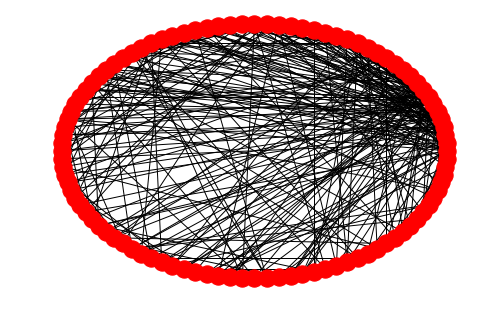

In [37]:
n = 100
n0 = 10
m = 3
A = preferentialgrowth_graph(n,n0,m)
G = nx.from_numpy_matrix(A)
nx.draw_circular(G, markersize = 0.01)

Text(0.5, 0, '$k$')

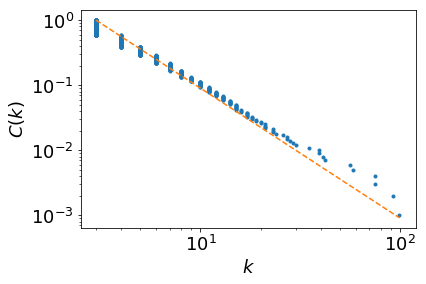

In [49]:
n = 1000
n0 = 5
m = 3
A = preferentialgrowth_graph(n,n0,m)
degrees = np.sum(A,1)
plt.loglog(np.sort(degrees)[::-1],np.arange(n)/n,'.')
plt.loglog(np.arange(m,np.max(degrees)),m**2*np.arange(m,np.max(degrees))**(-2),'--')
plt.rcParams.update({'font.size': 18})
plt.ylabel('$C(k)$')
plt.xlabel('$k$')